## Data Transformation

In [1]:
import numpy as np 
import pandas as pd


In [2]:
dataset = "https://raw.githubusercontent.com/TrainingByPackt/Data-Science-with-Python/master/Chapter01/Data/student.csv"

In [3]:
df = pd.read_csv(dataset, header = 0)

In [4]:
df

,Student_id,Age,Gender,Grade,Employed
0,1,19,Male,1st Class,yes
1,2,20,Female,2nd Class,no
2,3,18,Male,1st Class,no
3,4,21,Female,2nd Class,no
4,5,19,Male,1st Class,no
...,...,...,...,...,...
227,228,21,Female,1st Class,no
228,229,20,Male,2nd Class,no
229,230,20,Male,3rd Class,yes
230,231,19,Female,1st Class,yes


In [5]:
# Vælg kun kategoriske kolonner
df_categorical = df.select_dtypes(exclude=[np.number])

In [6]:
df_categorical

,Gender,Grade,Employed
0,Male,1st Class,yes
1,Female,2nd Class,no
2,Male,1st Class,no
3,Female,2nd Class,no
4,Male,1st Class,no
...,...,...,...
227,Female,1st Class,no
228,Male,2nd Class,no
229,Male,3rd Class,yes
230,Female,1st Class,yes


In [7]:
# Find unikke værdier i 'Grade'-kolonnen
df_categorical['Grade'].unique()


array(['1st Class', '2nd Class', '3rd Class'], dtype=object)

In [8]:
# Frekvensfordeling af 'Grade'
df_categorical.Grade.value_counts()

Grade
2nd Class    80
3rd Class    80
1st Class    72
Name: count, dtype: int64

In [9]:
# Frekvensfordeling af 'Gender'
df_categorical.Gender.value_counts()

Gender
Male      136
Female     96
Name: count, dtype: int64

In [10]:
# Frekvensfordeling af 'Employed'
df_categorical.Employed.value_counts()

Employed
no     133
yes     99
Name: count, dtype: int64

In [11]:
# Erstat kategoriske værdier med numeriske ækvivalenter
df_categorical.Grade.replace({"1st Class": 1, "2nd Class": 2, "3rd Class": 3}, inplace=True)
df_categorical.Gender.replace({"Male": 0, "Female": 1}, inplace=True)
df_categorical.Employed.replace({"yes": 1, "no": 0}, inplace=True)

C:\Users\moham\AppData\Local\Temp\ipykernel_14540\2887142481.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_categorical.Grade.replace({"1st Class": 1, "2nd Class": 2, "3rd Class": 3}, inplace=True)
C:\Users\moham\AppData\Local\Temp\ipykernel_14540\2887142481.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_down

In [12]:
# Vis den modificerede dataframe
df_categorical.head()

,Gender,Grade,Employed
0,0,1,1
1,1,2,0
2,0,1,0
3,1,2,0
4,0,1,0


In [13]:
# Indlæs Banking Marketing-datasættet
dataset = 'https://raw.githubusercontent.com/TrainingByPackt/Data-Science-with-Python/master/Chapter01/Data/Banking_Marketing.csv'
df = pd.read_csv(dataset, header=0)



In [14]:

# Fjern manglende data
df = df.dropna()

In [15]:
# Vælg ikke-numeriske kolonner
data_column_category = df.select_dtypes(exclude=[np.number]).columns
df[data_column_category].head()


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,nonexistent
1,technician,married,unknown,no,no,no,cellular,nov,fri,nonexistent
2,management,single,university.degree,no,yes,no,cellular,jun,thu,success
3,services,married,high.school,no,no,no,cellular,apr,fri,nonexistent
4,retired,married,basic.4y,no,yes,no,cellular,aug,fri,success


In [16]:
from sklearn.preprocessing import LabelEncoder

# Initialiser LabelEncoder
label_encoder = LabelEncoder()

# Anvend Label Encoding på kategoriske kolonner
for col in data_column_category:
    df[col] = label_encoder.fit_transform(df[col])

# Vis dataframen med label-enkodede værdier
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44.0,1,1,0,1,2,0,0,1,2,...,1,999,0,1,1.4,93.444,-36.1,4.963,5228.1,0
1,53.0,9,1,7,0,0,0,0,7,0,...,1,999,0,1,-0.1,93.200,-42.0,4.021,5195.8,0
2,28.0,4,2,6,0,2,0,0,4,2,...,3,6,2,2,-1.7,94.055,-39.8,0.729,4991.6,1
3,39.0,7,1,3,0,0,0,0,0,0,...,2,999,0,1,-1.8,93.075,-47.1,1.405,5099.1,0
4,55.0,5,1,0,0,2,0,0,1,0,...,1,3,1,2,-2.9,92.201,-31.4,0.869,5076.2,1


In [17]:
# Label Encoding af kategoriske kolonner før One-Hot Encoding
for col in data_column_category:
    df[col] = label_encoder.fit_transform(df[col])

df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44.0,1,1,0,1,2,0,0,1,2,...,1,999,0,1,1.4,93.444,-36.1,4.963,5228.1,0
1,53.0,9,1,7,0,0,0,0,7,0,...,1,999,0,1,-0.1,93.200,-42.0,4.021,5195.8,0
2,28.0,4,2,6,0,2,0,0,4,2,...,3,6,2,2,-1.7,94.055,-39.8,0.729,4991.6,1
3,39.0,7,1,3,0,0,0,0,0,0,...,2,999,0,1,-1.8,93.075,-47.1,1.405,5099.1,0
4,55.0,5,1,0,0,2,0,0,1,0,...,1,3,1,2,-2.9,92.201,-31.4,0.869,5076.2,1


##  Load Data from Excel

In [18]:
file_path = r"C:\Users\moham\Downloads\Sales Orders Data.xlsx"

In [19]:
# Load the Excel file
data = pd.read_excel(file_path, sheet_name=0)

## Explore the Data

In [20]:
# View the first few rows
print("First few rows of the data:")
print(data.head())


First few rows of the data:
   # SalesOrderID  RevisionNumber  OrderDate    DueDate   ShipDate  \
0           43659               1 2001-07-01 2001-07-13 2001-07-08   
1           43660               1 2001-07-01 2001-07-13 2001-07-08   
2           43661               1 2001-07-01 2001-07-13 2001-07-08   
3           43662               1 2001-07-01 2001-07-13 2001-07-08   
4           43663               1 2001-07-01 2001-07-13 2001-07-08   

   OnlineOrderFlag  CustomerID  ContactID  SalesPersonID  TerritoryID  \
0                0         676        378          279.0            5   
1                0         117        216          279.0            5   
2                0         442        281          282.0            6   
3                0         227        564          282.0            6   
4                0         510         97          276.0            4   

   BillToAddressID  ShipToAddressID  ShipMethodID  TotalDue, USD  \
0              985              985         

In [21]:
# Check the structure and types of data

print("\nInformation about the data:")
print(data.info())



Information about the data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31465 entries, 0 to 31464
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   # SalesOrderID   31465 non-null  int64         
 1   RevisionNumber   31465 non-null  int64         
 2   OrderDate        31465 non-null  datetime64[ns]
 3   DueDate          31465 non-null  datetime64[ns]
 4   ShipDate         31465 non-null  datetime64[ns]
 5   OnlineOrderFlag  31465 non-null  int64         
 6   CustomerID       31465 non-null  int64         
 7   ContactID        31465 non-null  int64         
 8   SalesPersonID    3806 non-null   float64       
 9   TerritoryID      31465 non-null  int64         
 10  BillToAddressID  31465 non-null  int64         
 11  ShipToAddressID  31465 non-null  int64         
 12  ShipMethodID     31465 non-null  int64         
 13  TotalDue, USD    31465 non-null  float64       
 14  salesreas

In [22]:
# Summary statistics
print(data.describe())

       # SalesOrderID  RevisionNumber                      OrderDate  \
count    31465.000000    31465.000000                          31465   
mean     59391.000000        1.000953  2003-09-22 11:43:49.321468416   
min      43659.000000        1.000000            2001-07-01 00:00:00   
25%      51525.000000        1.000000            2003-07-22 00:00:00   
50%      59391.000000        1.000000            2003-12-05 00:00:00   
75%      67257.000000        1.000000            2004-03-31 00:00:00   
max      75123.000000        2.000000            2004-07-31 00:00:00   
std       9083.307446        0.030864                            NaN   

                             DueDate                       ShipDate  \
count                          31465                          31465   
mean   2003-10-04 11:44:14.034641664  2003-09-29 11:44:14.034641792   
min              2001-07-13 00:00:00            2001-07-08 00:00:00   
25%              2003-08-03 00:00:00            2003-07-29 00:00:00

In [23]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
# SalesOrderID         0
RevisionNumber         0
OrderDate              0
DueDate                0
ShipDate               0
OnlineOrderFlag        0
CustomerID             0
ContactID              0
SalesPersonID      27659
TerritoryID            0
BillToAddressID        0
ShipToAddressID        0
ShipMethodID           0
TotalDue, USD          0
salesreasonId       8453
dtype: int64


## Clean the Data

In [24]:
# Udfyld manglende talværdier med gennemsnittet
data.fillna(data.mean(numeric_only=True), inplace=True)

In [25]:
# Udfyld manglende tekstværdier med 'Ukendt'
data.fillna('Ukendt', inplace=True)

In [26]:
# Fjern duplikerede rækker
data.drop_duplicates(inplace=True)

In [27]:
print("\nCleaned Data Preview:")
print(data.head())


Cleaned Data Preview:
   # SalesOrderID  RevisionNumber  OrderDate    DueDate   ShipDate  \
0           43659               1 2001-07-01 2001-07-13 2001-07-08   
1           43660               1 2001-07-01 2001-07-13 2001-07-08   
2           43661               1 2001-07-01 2001-07-13 2001-07-08   
3           43662               1 2001-07-01 2001-07-13 2001-07-08   
4           43663               1 2001-07-01 2001-07-13 2001-07-08   

   OnlineOrderFlag  CustomerID  ContactID  SalesPersonID  TerritoryID  \
0                0         676        378          279.0            5   
1                0         117        216          279.0            5   
2                0         442        281          282.0            6   
3                0         227        564          282.0            6   
4                0         510         97          276.0            4   

   BillToAddressID  ShipToAddressID  ShipMethodID  TotalDue, USD  \
0              985              985             5

## Visualiserings

In [28]:
import matplotlib.pyplot as plt

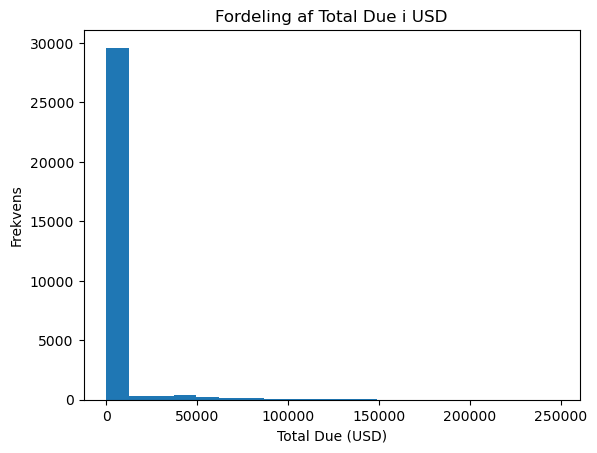

In [29]:
# Tegner et histogram over 'TotalDue, USD'
plt.hist(data['TotalDue, USD'], bins=20)  # 'TotalDue, USD' viser salgsbeløbet
plt.title('Fordeling af Total Due i USD')  # Sætter titlen på grafen
plt.xlabel('Total Due (USD)')  # Navngiver X-aksen
plt.ylabel('Frekvens')  # Navngiver Y-aksen
plt.show()  # Viser grafen

In [30]:
import seaborn as sns

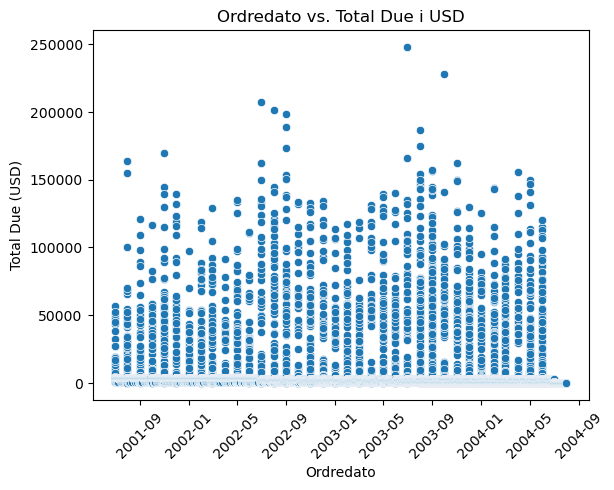

In [31]:
# Tegner et scatter plot mellem 'OrderDate' og 'TotalDue, USD'
sns.scatterplot(data=data, x='OrderDate', y='TotalDue, USD')  # Viser forholdet mellem dato og beløb
plt.title('Ordredato vs. Total Due i USD')  # Sætter titlen på grafen
plt.xlabel('Ordredato')  # Navngiver X-aksen
plt.ylabel('Total Due (USD)')  # Navngiver Y-aksen
plt.xticks(rotation=45)  # Roterer datoer for bedre læsbarhed
plt.show()  # Viser grafen

## Læse JSON fra en URL

In [32]:
import requests
import json
import pandas as pd

In [33]:
# URL til JSON-data 
url = 'https://raw.githubusercontent.com/foxdocs/cph-bi-2024/main/Code/Readers/ReadWiki.ipynb'


In [34]:
# Hent data fra URL'en
response = requests.get(url)

In [35]:
# Tjek om anmodningen var succesfuld
if response.status_code == 200:
    # Læs dataen som binært indhold og dekod til tekst
    raw_data = response.content.decode('utf-8')
    print("data hentet og anmodningen var succesfuldt!")

data hentet og anmodningen var succesfuldt!


In [36]:
   # Konverter den dekodede tekst til JSON-format
data = json.loads(raw_data)
print("JSON data hentet og konverteret succesfuldt!")

JSON data hentet og konverteret succesfuldt!


In [37]:
  # Udtræk cellerne fra dataen
cells = data.get('cells', [])

In [38]:
   for i, cell in enumerate(cells):
        cell_type = cell.get('cell_type', 'ukendt')
        content = ''.join(cell.get('source', []))
        print(f"\nCelle {i + 1}: ({cell_type})")
        print(content)



Celle 1: (markdown)
# Search Web and Read Wikipedia

Celle 2: (code)
#!pip install wikipedia

Celle 3: (code)
#!pip install googlesearch-python

Celle 4: (code)
import requests
import pandas as pd

Celle 5: (code)
%%writefile readwiki.py
import wikipedia
from googlesearch import search
#  Read the main page
def readWiki(subject, lang, n):
    result = []
    wdict = {}
    wikipedia.set_lang(lang)
    
    wsum = wikipedia.summary(subject, sentences=n)
    
    wpage = wikipedia.page(subject)   
    wtext = wpage.content
    whtml = wpage.html
    wlinks = wpage.links[0:n]
    
    wdict = {'url': wpage.url, 'title':wpage.title, 'summary': wsum, 'links':wlinks, 'html':whtml }
    
    result.append(wdict)
    result.append(wtext)
    return result

# Read related pages that reference the main search
from googlesearch import search
def browseWeb(subject, lang, num): 
    list = []
    for i in search(subject, num_results=num, lang=lang, advanced=True):
        list.append(i)
    return

## Search Web and Read Wikipedia

In [3]:
!pip install googlesearch-python

In [7]:
!pip install wikipedia-api


In [32]:
%%writefile readwiki.py
import requests
import pandas as pd
import wikipediaapi
from googlesearch import search

Overwriting readwiki.py


In [56]:
# Funktion til at læse en Wikipedia-side
def readWiki(subject, lang='en', n=5):
    user_agent = "https://da.wikipedia.org"
    
    # Opret et Wikipedia API-objekt med det ønskede sprog og brugeragent
    wiki_wiki = wikipediaapi.Wikipedia(
        language=lang,
        user_agent=user_agent
    )
    
    # Hent siden baseret på emnet
    page = wiki_wiki.page(subject)

    # Tjek om siden eksisterer
    if page.exists():
        # Hent de første n sætninger i opsummeringen
        summary = page.summary.split('\n')[:n]
        
        # Opret et dictionary med de nødvendige informationer
        wdict = {
            'url': page.fullurl,
            'title': page.title,
            'summary': ' '.join(summary),  # Kombiner sætningerne til en opsummering
            'links': list(page.links.keys())[:n],  # Udtræk de første n links fra siden
            'html': page.text[:500]  # Hent de første 500 tegn af sidens tekst
        }

        # Tilføj resultaterne til listen
        result = [wdict, page.text]
    else:
        print(f"Siden '{subject}' findes ikke.")
        result = []  # Returner en tom liste, hvis siden ikke findes

    return result

In [58]:
# Eksempel på brug af funktionen
result = readWiki('Programming', lang='en', n=5)
print("Wikipedia Information:")
if result:
    print(result[0])  # Udskriver de opsummerede oplysninger fra Wikipedia
else:
    print("Ingen information fundet.")

Wikipedia Information:
{'url': 'https://en.wikipedia.org/wiki/Program', 'title': 'Program', 'summary': 'Program, programme, programmer, or programming may refer to:', 'links': ['Application software', 'B-movie', 'Broadcast programming', 'Computer program', 'Computer programming'], 'html': 'Program, programme, programmer, or programming may refer to:\n\nBusiness and management\nProgram management, the process of managing several related projects\nTime management\nProgram, a part of planning\n\nArts and entertainment\nAudio\nProgramming (music), generating music electronically\nRadio programming, act of scheduling content for radio\nSynthesizer programmer, a person who develops the instrumentation for a piece of music\n\nVideo or television\nBroadcast programming, scheduling content for televisio'}


In [1]:
import os
print(os.getcwd())

C:\Users\moham\Downloads\Python\newnotebook
